In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [65]:
#data preprocessing

#dataset overview
ecc = pd.read_csv('ecc_dataset.csv')
ecc.head()
ecc.info()
ecc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SNR                 10000 non-null  float64
 1   BER                 10000 non-null  float64
 2   Noise Power         10000 non-null  float64
 3   Latency             10000 non-null  int64  
 4   Bandwidth           10000 non-null  float64
 5   Error Burst Length  10000 non-null  int64  
 6   Data Type           10000 non-null  object 
 7   Network Type        10000 non-null  object 
 8   Optimal ECC         10000 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 703.3+ KB


,SNR,BER,Noise Power,Latency,Bandwidth,Error Burst Length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.043422,0.012737,0.266595,268.672300,53.599156,3.990800
std,8.913329,0.072620,0.178813,180.718061,41.458262,2.480671
min,-5.000000,0.000002,0.000000,1.000000,0.981013,1.000000
25%,7.424435,0.002561,0.136000,134.750000,26.010734,2.000000
50%,14.986679,0.005048,0.259000,261.000000,51.013203,4.000000
75%,22.570135,0.007521,0.382000,384.000000,76.416140,6.000000
max,49.447711,1.000000,1.991000,1936.000000,500.000000,10.000000


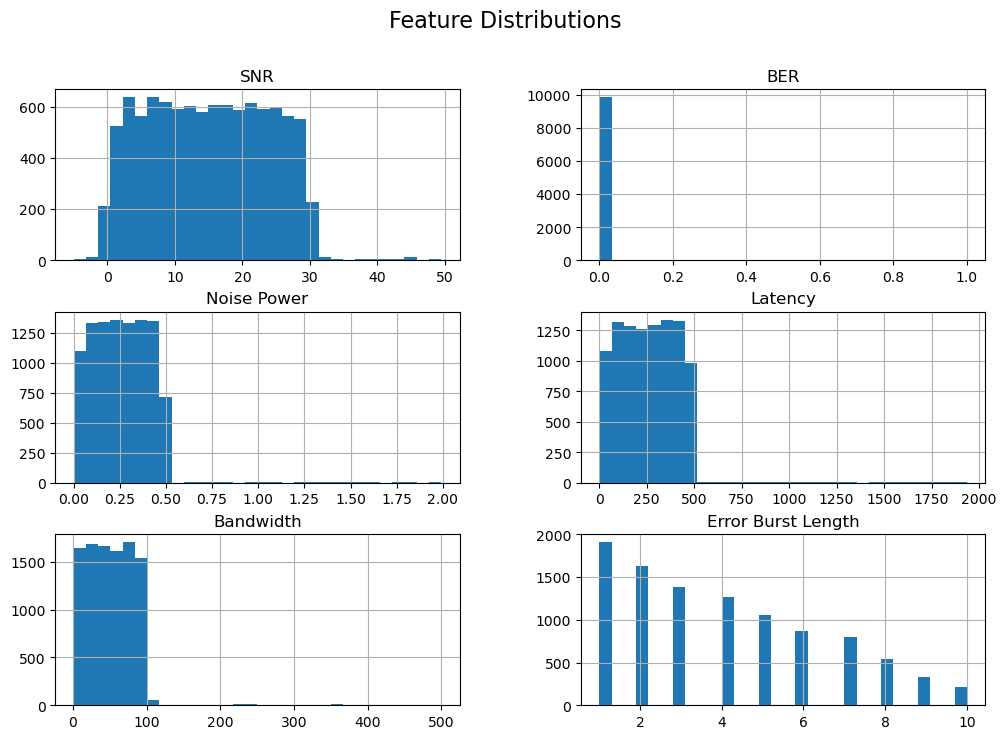

In [10]:
ecc.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

/var/folders/fw/5mws3bxj5x5dq0d0m7ccwk380000gn/T/ipykernel_20872/2622901765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ecc["Optimal ECC"], palette="viridis")


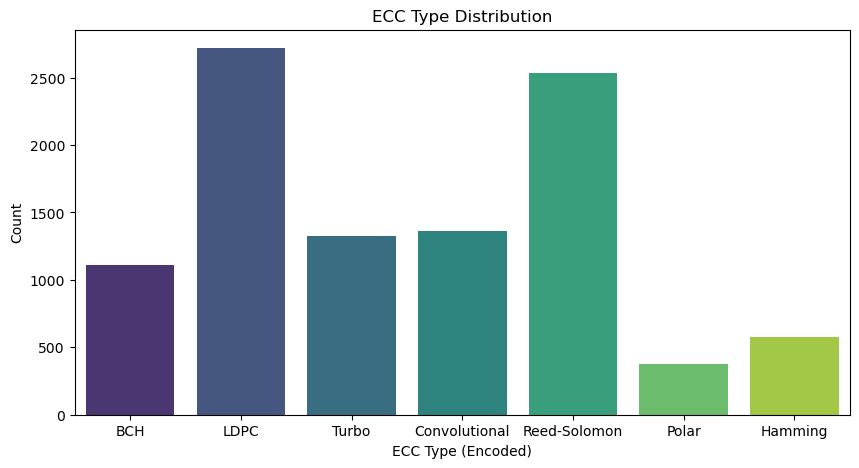

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x=ecc["Optimal ECC"], palette="viridis")
plt.title("ECC Type Distribution")
plt.xlabel("ECC Type (Encoded)")
plt.ylabel("Count")
plt.show()

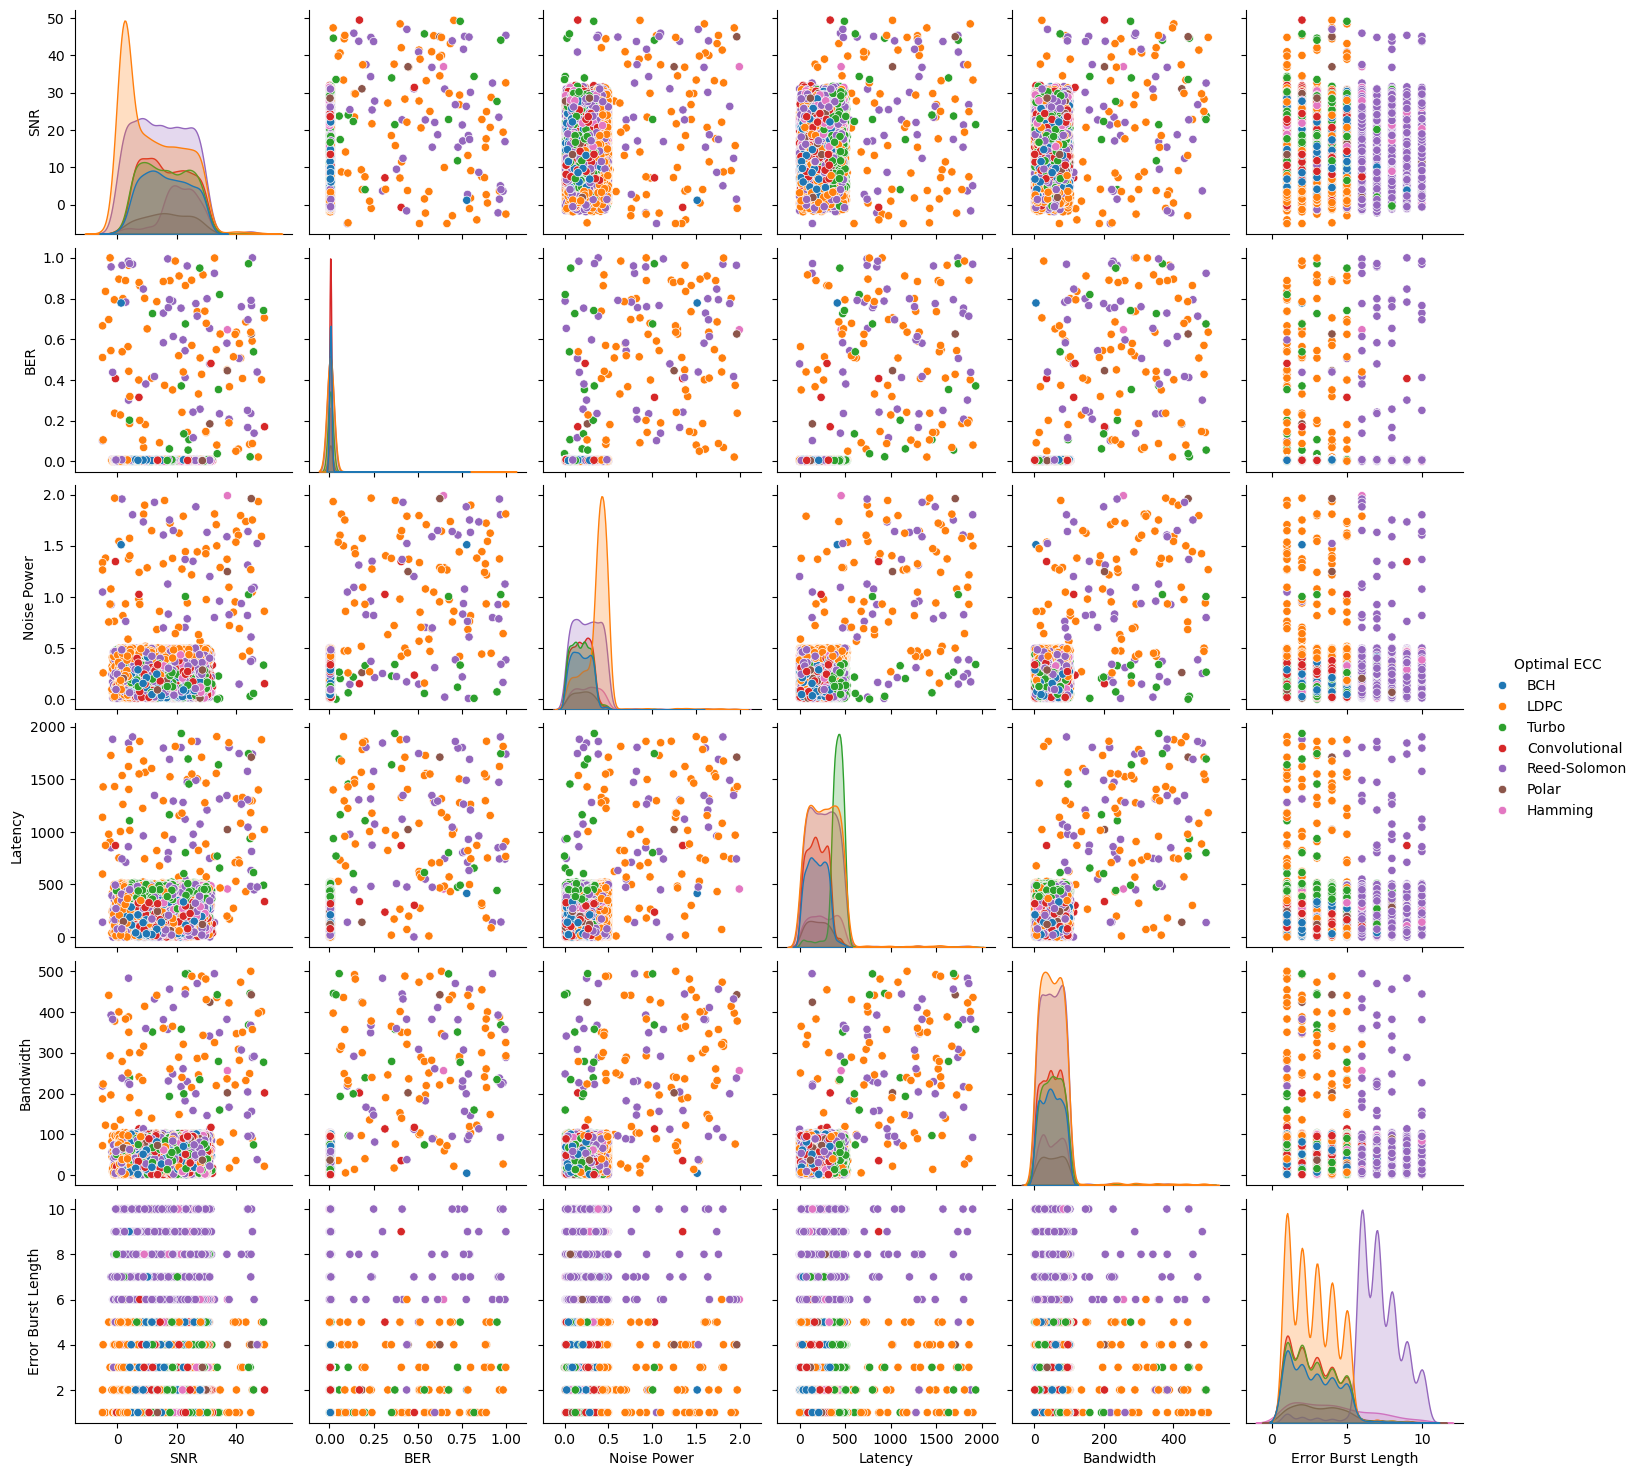

In [20]:
sns.pairplot(ecc, hue="Optimal ECC", diag_kind="kde")
plt.show()

In [67]:
#encoding non-numerical data
ecc['Data Type'] = ecc['Data Type'].map({'Streaming': 0, 'Packet': 1})
ecc['Network Type'] = ecc['Network Type'].map({'Wi-Fi': 0, '5G': 1, 'Satellite': 2, 'IoT': 3, 'Storage': 4})
ecc['Optimal ECC'] = ecc['Optimal ECC'].map({'Hamming': 0, 'Reed-Solomon': 1, 'BCH': 2, 'LDPC': 3, 'Turbo': 4, 'Convolutional': 5, 'Polar': 6})

ecc.head()

,SNR,BER,Noise Power,Latency,Bandwidth,Error Burst Length,Data Type,Network Type,Optimal ECC
0,18.149818,0.006893,0.292,154,57.948430,4,1,4,2
1,13.225703,0.008966,0.488,255,99.078012,2,0,1,3
2,22.753958,0.001112,0.427,314,49.469618,4,1,1,3
3,1.473567,0.000182,0.065,430,19.630334,3,1,2,3
4,22.528353,0.008378,0.234,357,19.787727,1,0,0,4


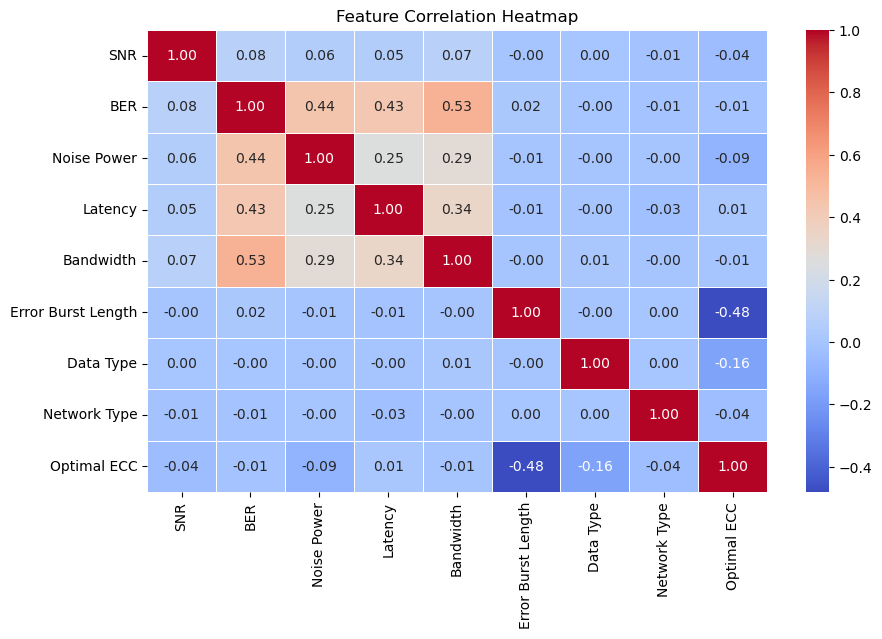

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(ecc.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
#check for missing values
print(ecc.isna().sum())


SNR                   0
BER                   0
Noise Power           0
Latency               0
Bandwidth             0
Error Burst Length    0
Data Type             0
Network Type          0
Optimal ECC           0
dtype: int64


In [69]:
X = ecc.drop(columns=['Optimal ECC'])
y = ecc['Optimal ECC']
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=42)



Decision Tree




In [34]:
#Decision Tree Algorithm

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print(f'Accuracy: {accuracy_dt}')

Accuracy: 0.8313333333333334


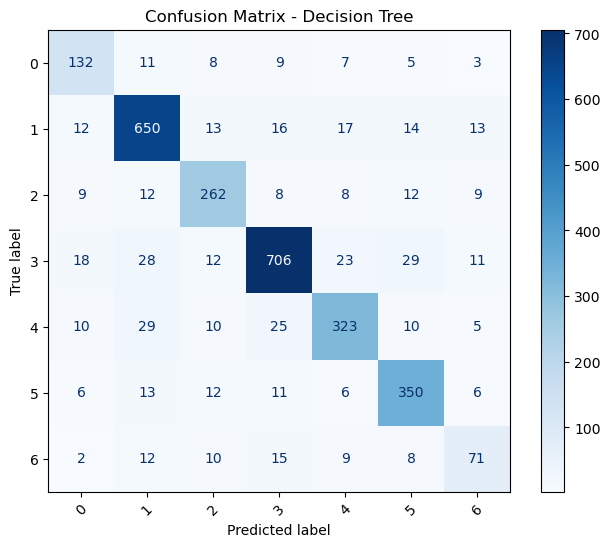

In [36]:
#Confusion Matrix for decision tree 
cm_dt = confusion_matrix(y_test,y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix - Decision Tree")
plt.savefig("confusion_matrix_dt.png", dpi=300, bbox_inches='tight') #to save the file as png
plt.show()
plt.close()

In [38]:
#Classification Report for Decision Tree
cr_dt = classification_report(y_test,y_pred_dt)
print("Classification report for Decision Tree: \n", cr_dt)

Classification report for Decision Tree: 
               precision    recall  f1-score   support

           0       0.70      0.75      0.73       175
           2       0.86      0.88      0.87       735
           3       0.80      0.82      0.81       320
           4       0.89      0.85      0.87       827
           5       0.82      0.78      0.80       412
           6       0.82      0.87      0.84       404
           7       0.60      0.56      0.58       127

    accuracy                           0.83      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.83      0.83      0.83      3000





RANDOM FOREST ALGORITHM

In [41]:
#Random forest algorithm

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees for strong performance
rf_model.fit(X_train, y_train)  # Use RAW (unscaled) data

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy: 0.9186666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86       175
           2       0.92      0.97      0.95       735
           3       0.90      0.92      0.91       320
           4       0.93      0.96      0.94       827
           5       0.91      0.88      0.89       412
           6       0.93      0.92      0.92       404
           7       0.92      0.64      0.75       127

    accuracy                           0.92      3000
   macro avg       0.92      0.87      0.89      3000
weighted avg       0.92      0.92      0.92      3000


Confusion Matrix:
 [[142   9   3   8   6   4   3]
 [  1 711   4   9   4   5   1]
 [  3   6 294   6   5   6   0]
 [  3  10   6 793   8   6   1]
 [  3  14   8  18 363   4   2]
 [  2  11   5   9   5 372   0]
 [  2   8   8  14   9   5  81]]


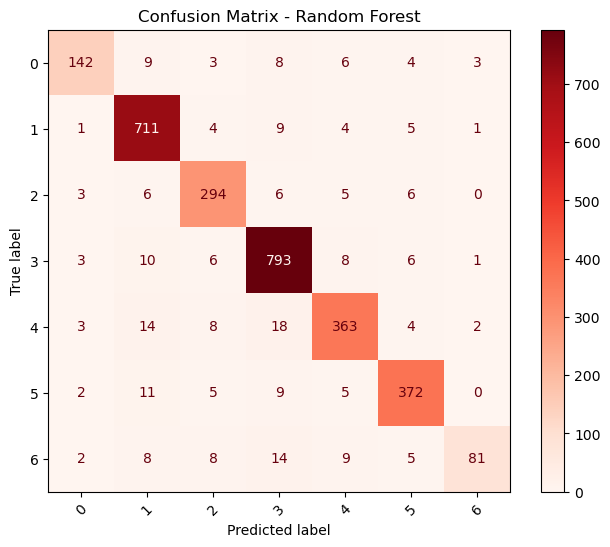

In [43]:


# Plot confusion matrix for Random forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Reds", ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest")
plt.savefig("confusion_matrix_rf.png", dpi=300, bbox_inches='tight') # to save the file as png
plt.show()
plt.close()

/var/folders/fw/5mws3bxj5x5dq0d0m7ccwk380000gn/T/ipykernel_20872/4044487794.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


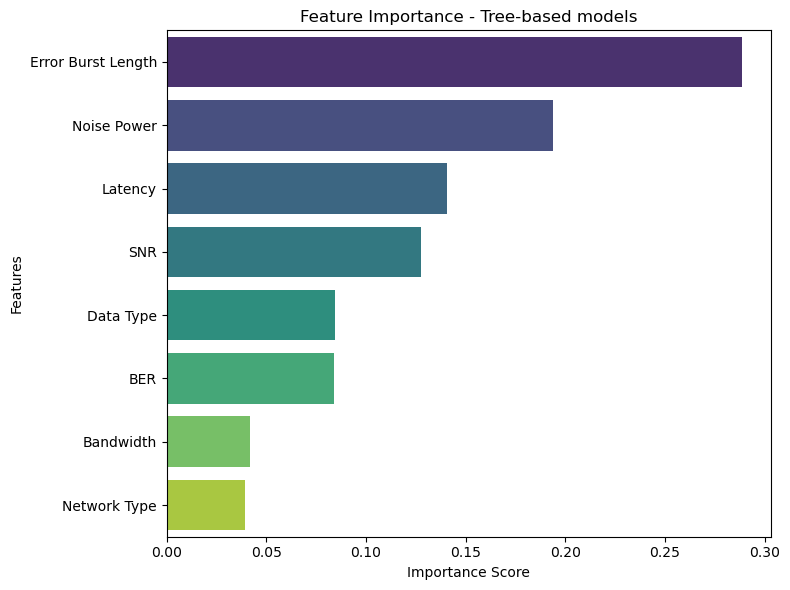

In [45]:
# Get feature importance values
importances = rf_model.feature_importances_
features = X.columns

# Create DataFrame and sort
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance - Tree-based models') #relevant to random forest, decision tree, XGBoost but not SVMs
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

ADABOOST ALGORITHM

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



 AdaBoost Accuracy: 0.8773
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.34      0.50       175
           2       0.91      0.96      0.94       735
           3       0.78      0.91      0.84       320
           4       0.90      0.95      0.92       827
           5       0.84      0.88      0.86       412
           6       0.88      0.91      0.89       404
           7       0.94      0.48      0.64       127

    accuracy                           0.88      3000
   macro avg       0.88      0.78      0.80      3000
weighted avg       0.88      0.88      0.87      3000



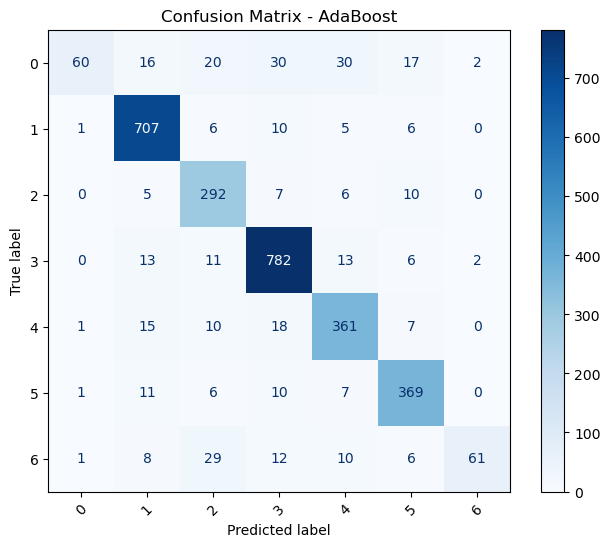

In [48]:
#Adaboost

# Define and train AdaBoost model
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=145,
    learning_rate=0.2,
    random_state=42
)
adaboost.fit(X_train, y_train)

# Predict & evaluate
y_pred_ada = adaboost.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
print(f"\n AdaBoost Accuracy: {acc_ada:.4f}")
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

# Save Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada)
fig, ax = plt.subplots(figsize=(8, 6))
disp_ada.plot(cmap="Blues", ax=ax, xticks_rotation=45) 
plt.title("Confusion Matrix - AdaBoost")
plt.savefig("adaboost_confusion_matrix.png", dpi=300, bbox_inches='tight') #save confusion matrix as png file
plt.show()
plt.close()


XGBOOST ALGORITHM

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9187
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       175
           1       0.93      0.97      0.95       735
           2       0.89      0.92      0.90       320
           3       0.93      0.96      0.94       827
           4       0.91      0.88      0.89       412
           5       0.93      0.92      0.92       404
           6       0.91      0.64      0.75       127

    accuracy                           0.92      3000
   macro avg       0.91      0.87      0.89      3000
weighted avg       0.92      0.92      0.92      3000



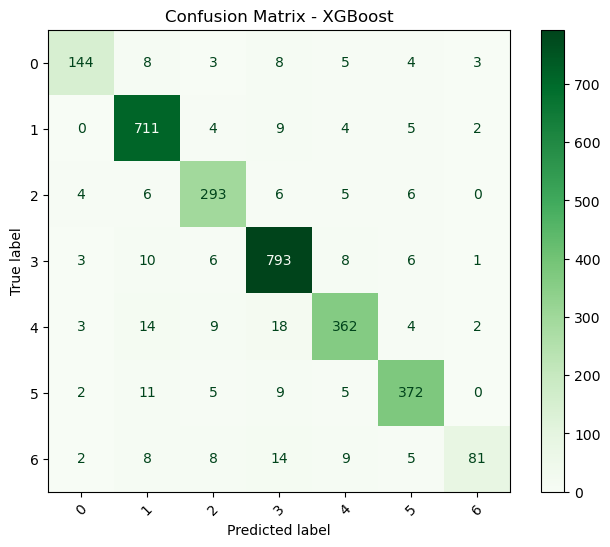

In [71]:
#XGBoost

# Define and train XGBoost model
xgb = XGBClassifier(
    n_estimators=145,
    max_depth=5,
    learning_rate=0.05,
    use_label_encoder=False,
    eval_metric='mlogloss',  # multi-class classification
    random_state=42
)
xgb.fit(X_train, y_train)

# Predict & evaluate
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nXGBoost Accuracy: {acc_xgb:.4f}")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Save Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
fig, ax = plt.subplots(figsize=(8, 6))
disp_xgb.plot(cmap="Greens", ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix - XGBoost")
plt.savefig("xgboost_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()
